# Transfer Learning Template 
### Author: Armando Ordorica

### Helper Functions

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz

# Define a function to unnormalize and show the image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
print("start")

start


### Setting Device to Use Apple M1 Max GPU

In [3]:

# Check if MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device")
else:
    device = torch.device("cpu")
    print("MPS device not found. Using CPU")


Using MPS device


### 1. Load the CIFAR-10 dataset

In [4]:

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### 2. Load the pre-trained model and modify the final layer

In [5]:
model = torchvision.models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)
model = model.to(device)  # Move model to the chosen device

### 3. Define a loss function and optimizer

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### 4. Fine-tune the model


In [7]:
# 4. Fine-tune the model
loss_values = []

for epoch in range(1):  # Change to 1 epoch for quick test
    print(epoch)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)  # Move data to the chosen device

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:  # Print loss every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            
            loss_values.append(running_loss / 500)
            running_loss = 0.0
        
        if i == 999:  # Limit to 1000 mini-batches for quick test
            break

print('Finished Fine-tuning')


0
[1,   500] loss: 1.533
[1,  1000] loss: 1.181
Finished Fine-tuning


In [10]:


# Define the EST timezone
est = pytz.timezone('US/Eastern')

# Get the current time in UTC and convert to EST
current_time_est = datetime.datetime.now(pytz.utc).astimezone(est)

print(current_time_est.strftime('%Y-%m-%d %H:%M:%S %Z%z'))
timestamp_file = current_time_est.strftime('%Y_%m_%d_%H_%M_%S')
timestamp_file

2023-10-21 13:30:46 EDT-0400


'2023_10_21_13_30_46'

### 5. Test the model on test data

In [14]:
num_batches = len(testloader)
batch_size = testloader.batch_size
total_test_images = num_batches * batch_size
total_test_images = len(testloader.dataset)


print(num_batches, batch_size, total_test_images)

2500 4 10000


In [15]:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)  # Move data to the chosen device
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

torch.save(model, f'entire_fine_tuned_resnet18_{timestamp_file}.pth')


Accuracy of the network on the 10000 test images: 62 %


### 5. Load the saved model


In [17]:
model = torch.load(f'entire_fine_tuned_resnet18_{timestamp_file}.pth')
model = model.to(device)

#### 5.1 Set the model to evaluation mode

In [18]:
model.eval()  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  


### 6. Test the model on test data

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)  # Move data to the chosen device
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 75 %


### 6.1 Shuffling the Test Loader so that every time I sample I get different Images

In [20]:

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True)

Files already downloaded and verified


### 7. Visualize true vs predicted labels on random samples

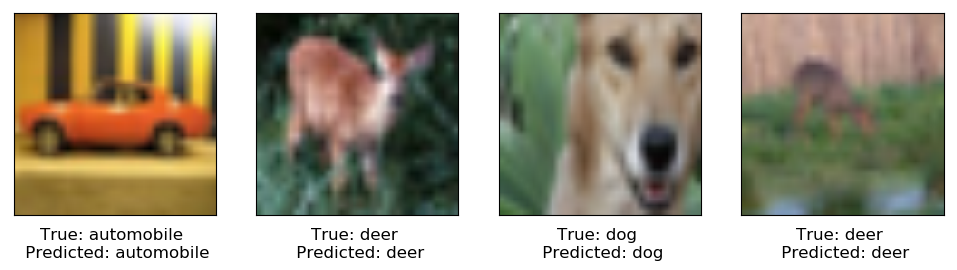

In [39]:


# Define the classes of CIFAR-10
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')


# Get a random sample from the test dataset
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels for the sample
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)


# Plot the images along with true and predicted labels
fig = plt.figure(figsize=(12, 6))
for idx in range(4):  # Assuming a batch size of 4
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(f"True: {classes[labels[idx].item()]} \n Predicted: {classes[predicted[idx].item()]}", y=-0.25)

plt.show()

In [40]:
ls

A2_Hand_Gesture_Dataset.zip
Flower_Data/
Lab_3b_Gesture_Dataset/
Pre2A_CNN.ipynb
Pre2B_Transfer_Learning.ipynb
Resizing_Images.ipynb
Untitled-1.ipynb
a2.jpg
b3.jpg
cat.jpg
cat2.jpg
data/
dog.jpg
entire_fine_tuned_resnet18.pth
entire_fine_tuned_resnet18_2023_10_21_13_30_46.pth
f1.jpg
h2.jpg
images/
part1-exploration.ipynb
part1-exploration.py
pipe1.py
pipe_bert.py
resized_images/
summarizer_example.py
transfer_learning_hello_world-Copy1.ipynb
transfer_learning_hello_world.ipynb


In [42]:
!jupyter nbconvert --to script transfer_learning_hello_world.ipynb

[NbConvertApp] Converting notebook transfer_learning_hello_world.ipynb to script
[NbConvertApp] Writing 5907 bytes to transfer_learning_hello_world.py
